In [2]:
#basic python functionality 
import copy
from collections import Counter
#import regex as re
import re

#data science libraries 
import pandas as pd
import numpy as np
import scipy 

#for base nlp functionality 
import spacy
from spacy.tokens import Doc
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.matcher import Matcher
from spacy.util import filter_spans

#plotting 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.cluster.hierarchy import dendrogram, linkage

#for sentiment analysis 
from transformers import pipeline

#import Document object, the "brains" of everything being done 
from DocumentWorking import Document 
import sys, importlib

nlp = spacy.load("en_core_web_lg")


/home/blitt/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_lg' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [3]:
#use this whenever we need to reload the Document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

In [4]:
#load in the data, create splits in the data according to three columns 
doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp, subsetColumns=["Persona", "Engagement", "Touchpoint"])

# -------------------BASIC FUNCTIONALITY---------------------

### workingDoc = a document object of document with special chars removed, "/" replaced with " or "
### allTokens = a list of all the spacy objects in the document with special characters removed. "/" replace with " or "
### importantTokens = a list of all spacy strings in the document with special chars and stop words removed. Lowercase 
### importantLemmas  = lemmatized version of importantTokens 
### spans = sentances in the document represented as spans 

In [10]:
#access these items with the document obj followed by a "."
print(doc.workingDoc[:5])
print(doc.importantTokens[:5])
print(doc.importantLemmas[:5])
print(doc.spans[:5])

Boring emails that get buried
['boring', 'emails', 'buried', 'lost', 'contacting']
['boring', 'email', 'bury', 'lost', 'contact']
[Boring emails that get buried in lost, Contacting faculty that are involved in their institution, Happy to discover that there is a group focusing on what she is looking for, Time conflict no easily accessible link to more information if you cant make the meeting, Connections and contacts with other research faculty]


# ---------------WORD COUNTING-----------------------

### basic bar charts 

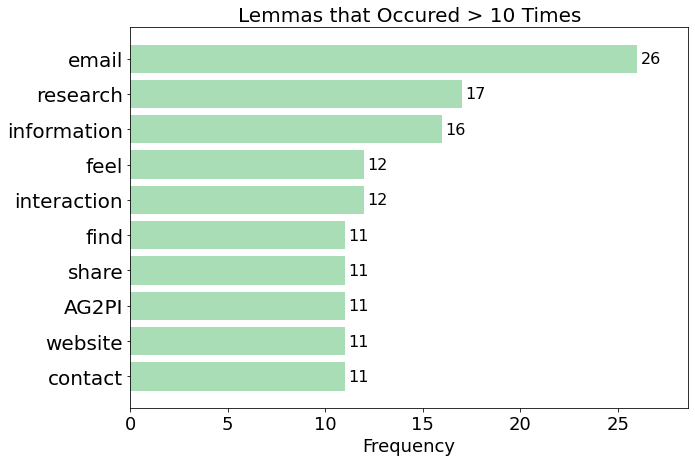

In [63]:
#get frequencies of top 10 lemmas 
tenDict = doc.getFreqDictCutoff(doc.importantLemmas, 10)

#plot basic bar chart, get matplotlib figure object so we can add our styling 
#dimensions is an optional keyword to set figure dimensions
#we can pass any key word arguments that would get passed to plt.barh() to this function, such as color
myFig = doc.freqDictBarChart(tenDict[0], dimensions=(10, 7), color="#a8ddb5")
ax = myFig.gca()

#STYLING
#set titles and tick sizes 
ax.set_title("Lemmas that Occured > 10 Times", size = 20)
ax.set_xlabel("Frequency", size=18)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=18)

#NOTE: to mess with bar length labels look at this answer on stack overflow, can be modified 
#by calling ax.bar_label() again or modifying code in the Document object (not reccomended)
#example on: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart/67561982#67561982


In [ ]:
#get frequencies of top 10 tokens (stop words removed)
topEight = doc.getTopFew(doc.importantTokens, 8)
print(topEight)
print(type(list(topEight.keys())[0]))

#plot basic bar chart, get matplotlib figure object so we can add our styling 
#dimensions is an optional keyword to set figure dimensions
#we can pass any key word arguments that would get passed to plt.barh() to this function, such as color
myFig = doc.freqDictBarChart(topEight, dimensions=(10, 7), color="#a8ddb5")
ax = myFig.gca()

#STYLING
#set titles and tick sizes 
ax.set_title("Eight Most Frequent Words", size = 20)
ax.set_xlabel("Frequency", size=18)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=18)

#just copy this code when adding bar value labels 
#example on: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart/67561982#67561982
#ax.margins(x=.1)
#ax.bar_label(ax.containers[0], fontsize=16)

### Basic word clouds

In [ ]:
#create a basic wordcloud with standard coloring 
#then we can show the fancy matching down below 
tenDict = doc.getFreqDictCutoff(doc.importantLemmas, 6)

#check out documentation comments for how the dimensions works
#basically dimensions creates a box of a given size and wcDimensions determines the proportions of the 
#wordcloud that is then stretched to fit into that box 
fig = doc.wordCloud(tenDict[0], dimensions=(10, 10), wcDimensions=(700, 500))

ax = fig.gca()
ax.set_title("Terms Occuring Over 6 Times", size=18)
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/polishedJul21/WCOver6.jpg", bbox_inches="tight", dpi=800)

In [ ]:
topEight = doc.getTopFew(doc.importantLemmas, 8)


#check out documentation comments for how the dimensions works
#basically dimensions creates a box of a given size and wcDimensions determines the proportions of the 
#wordcloud that is then stretched to fit into that box 
fig = doc.wordCloud(topEight, dimensions=(10, 10), wcDimensions=(700, 500))

ax = fig.gca()
ax.set_title("Top 8 Most Frequent Terms", size=18)
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/polishedJul21/WCTop8.jpg", bbox_inches="tight", dpi=800)

### Bar chart and word cloud with matching colors 

In [ ]:

tenDict = doc.getFreqDictCutoff(doc.importantLemmas, 6)
myFig = doc.coloredFreqDictBarChart(tenDict[0], dimensions=(5, 10))
ax = myFig.gca()

#Most Frequent Terms by color 
#set titles and tick sizes 
ax.set_title("Terms that Occured > 6 Times", size = 20)
ax.set_xlabel("Frequency", size=18)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=18)

#add margin so that label doesn't run over edge 
#ax.bar_label(ax.containers[0], fontsize=16)
#ax.margins(x=0.2)

plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/polishedJul21/coloredFreqsOver6.jpg", bbox_inches="tight")
plt.show()

In [ ]:
tenDict = doc.getFreqDictCutoff(doc.importantLemmas, 6)

#check out documentation comments for how the dimensions works
#basically dimensions creates a box of a given size and wcDimensions determines the proportions of the 
#wordcloud that is then stretched to fit into that box 
fig = doc.wordCloudMatching(tenDict[0], dimensions=(10, 10), wcDimensions=(700, 500))

ax = fig.gca()
ax.set_title("Terms Occuring Over 6 Times", size=18)

plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/polishedJul21/coloredWCOver6.jpg", bbox_inches="tight", dpi=800)



# ------------------SPLIT BY GROUPS-------------------------

### Over threshold version 

In [ ]:
#get lemmas split by values in the Persona Column 
lemmaDict = doc.getColSubAttributeDict("Persona", "importantLemmas")

#get count dictionary (will get one per value of Persona) with counts over three 
#this function works automatically 
countDict = doc.getFreqDictCutoff(lemmaDict, 3)

#these defaults are a bit touchy, best to leave them alone (especially top and bottom) unless they need to be changed 
#NOTE: to mess around with sizing of things get the axes 
#barwidth = inch per bar
#spacing = spacing between subplots in units of barwidth
#figx = figure width in inch
#top = an additional top margin 
#bottom = an additional bottom margin 
#left = left margin in units of bar width
#right = right margin in units of bar width
fig = doc.freqDictBarChartColumnSplit(countDict,.3, 2, 10, 1, 0, 10, 6)
fig.suptitle("Word Counts by Persona", fontsize=18)

In [ ]:
#here is an example of changing the size of the tick labels 

#get the axes objects as a list 
axes = fig.axes

#get the 0th axes, change the tick params 
#lot's of ways to do this, look at documentation for axes and axis objects at: 
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
#would want to loop through all in real world case, might have to adjust padding as well 
axes[0].tick_params(axis="both", labelsize=20)
fig

In [ ]:
#get lemmas split by values in the Persona Column 
lemmaDict = doc.getColSubAttributeDict("Touchpoint", "importantLemmas")

#get count dictionary (will get one per value of Persona) with counts over three 
#this function works automatically 
countDict = doc.getFreqDictCutoff(lemmaDict, 3)

#these defaults are a bit touchy, best to leave them alone (especially top and bottom) unless they need to be changed 
fig= doc.freqDictBarChartColumnSplit(countDict,.3, 2, 10, 1, 0, 10, 6)
fig.suptitle("Word Counts > 3 by Touchpoint", fontsize=18)

In [ ]:
#TODO: address what would happen if we had zero words over threshold, rn we are getting empty box 
#TODO: add numbers to bars 

### Top XX Terms version 

num of cats: 4
max values array: [5 5 5 5]


Text(0.5, 0.98, 'Top 5 Lemmas by Persona')

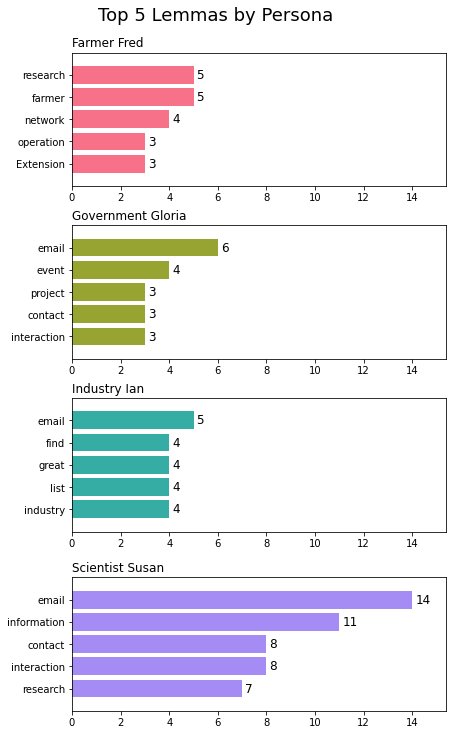

In [16]:
#get lemmas split by values in the Persona Column 
lemmaDict = doc.getColSubAttributeDict("Persona", "importantLemmas")
top4 = doc.getTopFew(lemmaDict, 5)
fig= doc.freqDictBarChartColumnSplit(top4,.3, 2, 10, 1, 0, 10, 6)
fig.suptitle("Top 5 Lemmas by Persona", fontsize=18)

num of cats: 6
max values array: [5 5 5 5 5 5]


Text(0.5, 0.98, 'Top 5 Tokens by Touchpoint')

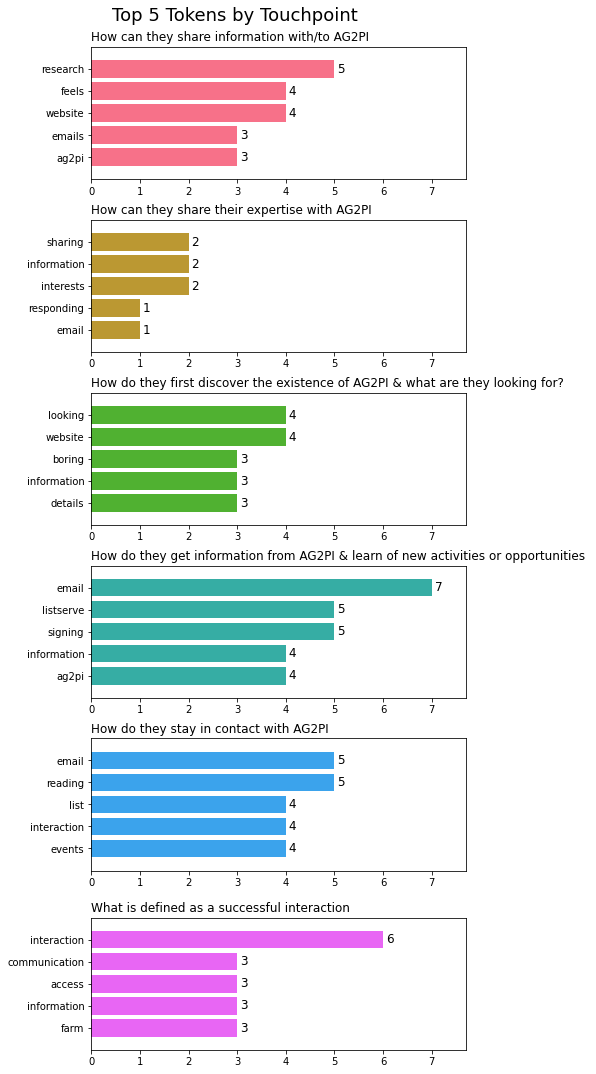

In [17]:
#TODO: space out labels from the edge of bars 
#get lemmas split by values in the Persona Column 
lemmaDict = doc.getColSubAttributeDict("Touchpoint", "importantTokens")
top4 = doc.getTopFew(lemmaDict, 5)
fig= doc.freqDictBarChartColumnSplit(top4,.3, 2, 10, 1, 0, 10, 6)
fig.suptitle("Top 5 Tokens by Touchpoint", fontsize=18)

# -----------------------Sentiment Analysis---------------------------

## Adding sentiment to frequency bar charts 

In [99]:
#use this whenever we need to reload the Document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

#if we want to do sentiment analysis, set "sentAnalysis = True" when creating subsetDoc object 
doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp, subsetColumns=["Persona", "Engagement", "Touchpoint"], sentAnalysis=True)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


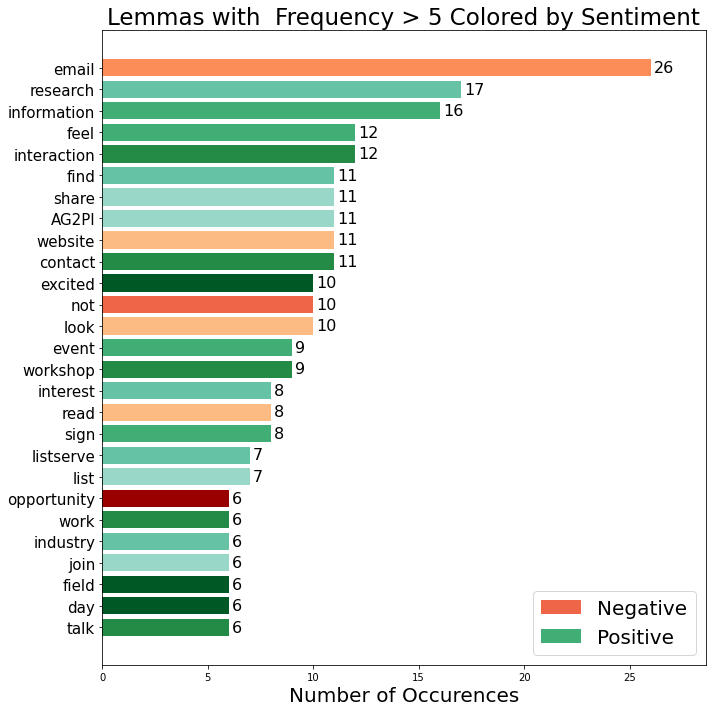

In [71]:
#get lemmas split by values in the Touchpoint column 
#get top 15 lemmas and their num of occurences 
freqDict = doc.getFreqDictCutoff(doc.importantLemmas, 5)[0]

#now find phrases corresponding to these terms 
#first pull apart dictionary 
sortedLists = doc.unZipFreqDict(freqDict)
freqKeys, freqVals = sortedLists

#now grab all spans that contain freqKeys 
wordSpanDict = doc.getWordSpans(freqKeys)

#get a dictionary of word -> avg sent of spans containing word 
wordSpanSents = doc.getWordSpanSent(wordSpanDict)

ax = doc.FreqSentBarChart(freqDict, wordSpanSents)

#START OF STYLING BY USER 
ax.set_title("Lemmas with  Frequency > 5 Colored by Sentiment", size=23)
ax.set_xlabel("Number of Occurences", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenSentiment.jpg")

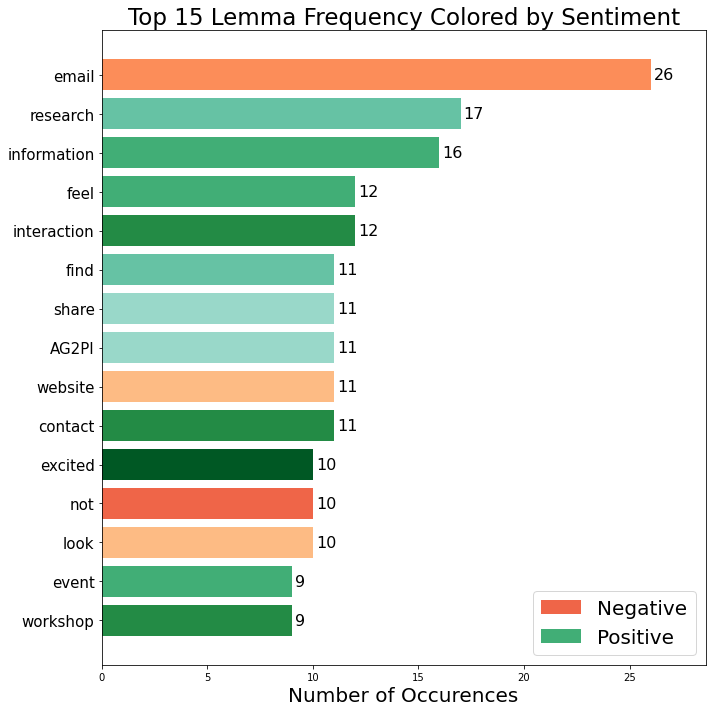

In [72]:
#get lemmas split by values in the Touchpoint column 
#get top 15 lemmas and their num of occurences 
freqDict = doc.getTopFew(doc.importantLemmas, 15)

#now find phrases corresponding to these terms 
#first pull apart dictionary 
sortedLists = doc.unZipFreqDict(freqDict)
freqKeys, freqVals = sortedLists

#now grab all spans that contain freqKeys 
wordSpanDict = doc.getWordSpans(freqKeys)

#get a dictionary of word -> avg sent of spans containing word 
wordSpanSents = doc.getWordSpanSent(wordSpanDict)

ax = doc.FreqSentBarChart(freqDict, wordSpanSents)

#START OF STYLING BY USER 
ax.set_title("Top 15 Lemma Frequency Colored by Sentiment", size=23)
ax.set_xlabel("Number of Occurences", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenSentiment.jpg")

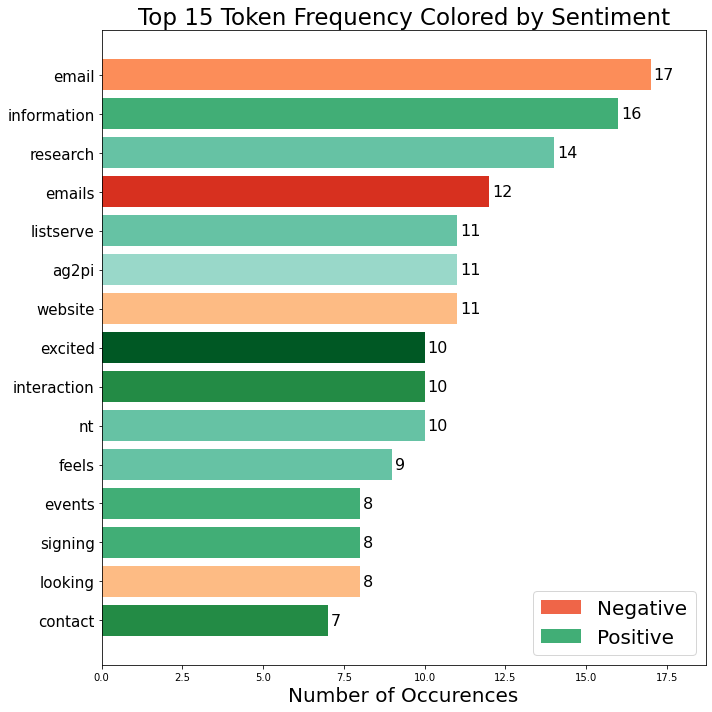

In [73]:
#get lemmas split by values in the Touchpoint column 
#get top 15 lemmas and their num of occurences 
freqDict = doc.getTopFew(doc.importantTokens, 15)

#now find phrases corresponding to these terms 
#first pull apart dictionary 
sortedLists = doc.unZipFreqDict(freqDict)
freqKeys, freqVals = sortedLists

#now grab all spans that contain freqKeys 
wordSpanDict = doc.getWordSpans(freqKeys)

#get a dictionary of word -> avg sent of spans containing word 
#TODO: address what we should do when we don't have sentances (for whatever reason) containing the word 
#and don't end up with the word in our wordSpanSents dictionary
wordSpanSents = doc.getWordSpanSent(wordSpanDict)


ax = doc.FreqSentBarChart(freqDict, wordSpanSents)

#START OF STYLING BY USER 
ax.set_title("Top 15 Token Frequency Colored by Sentiment", size=23)
ax.set_xlabel("Number of Occurences", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenSentiment.jpg")

### Looking at only sentiment

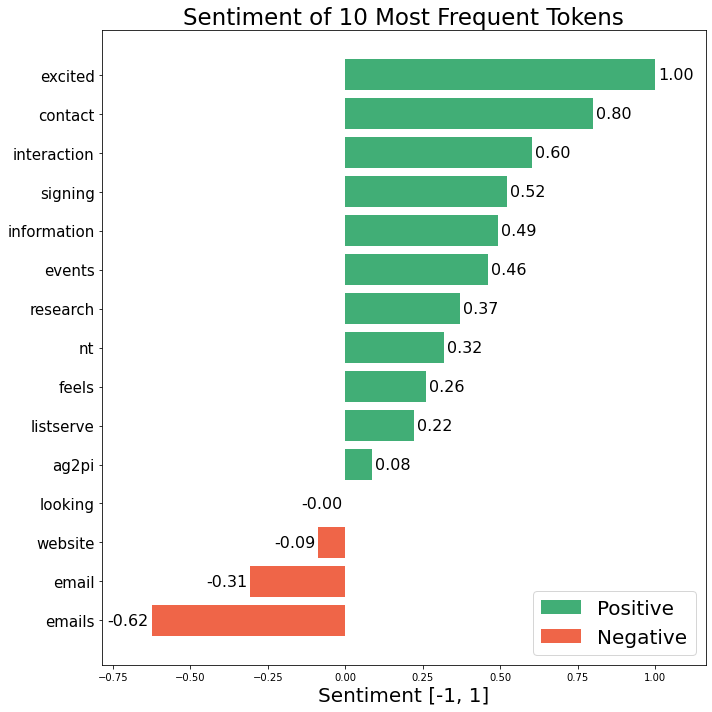

In [83]:
#get lemmas split by values in the Touchpoint column 
#get top 15 lemmas and their num of occurences 
freqDict = doc.getTopFew(doc.importantTokens, 15)

#now find phrases corresponding to these terms 
#first pull apart dictionary 
sortedLists = doc.unZipFreqDict(freqDict)
freqKeys, freqVals = sortedLists

#now grab all spans that contain freqKeys 
wordSpanDict = doc.getWordSpans(freqKeys)

#get a dictionary of word -> avg sent of spans containing word 
#TODO: address what we should do when we don't have sentances (for whatever reason) containing the word 
#and don't end up with the word in our wordSpanSents dictionary
wordSpanSents = doc.getWordSpanSent(wordSpanDict)

ax = doc.sentBarChart(wordSpanSents)

#START OF STYLING BY USER 
ax.set_title("Sentiment of 10 Most Frequent Tokens", size=23)
ax.set_xlabel("Sentiment [-1, 1]", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
#plt.rcParams["legend.position"] = "left"
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenJUSTSentiment.jpg")

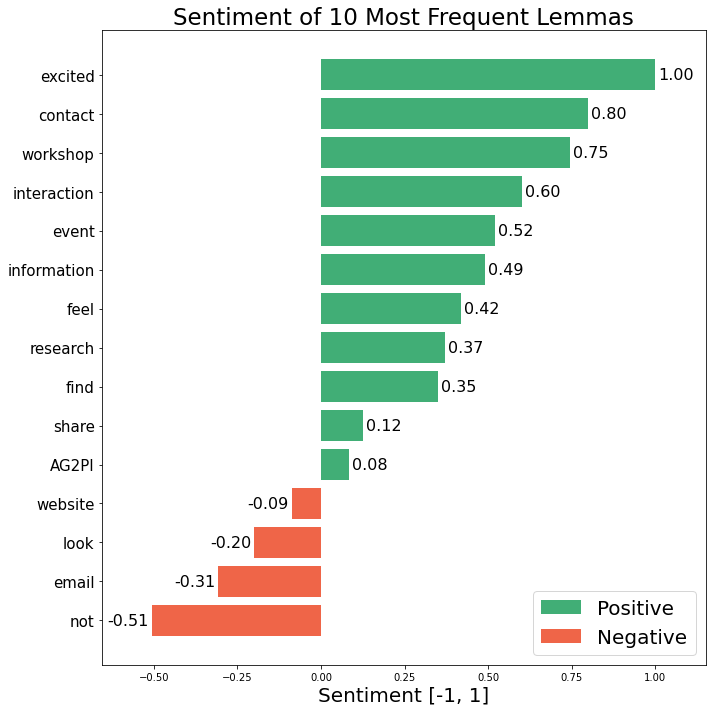

In [85]:
#get lemmas split by values in the Touchpoint column 
#get top 15 lemmas and their num of occurences 
freqDict = doc.getTopFew(doc.importantLemmas, 15)

#now find phrases corresponding to these terms 
#first pull apart dictionary 
sortedLists = doc.unZipFreqDict(freqDict)
freqKeys, freqVals = sortedLists

#now grab all spans that contain freqKeys 
wordSpanDict = doc.getWordSpans(freqKeys)

#get a dictionary of word -> avg sent of spans containing word 
#TODO: address what we should do when we don't have sentances (for whatever reason) containing the word 
#and don't end up with the word in our wordSpanSents dictionary
wordSpanSents = doc.getWordSpanSent(wordSpanDict)

ax = doc.sentBarChart(wordSpanSents)

#START OF STYLING BY USER 
ax.set_title("Sentiment of 10 Most Frequent Lemmas", size=23)
ax.set_xlabel("Sentiment [-1, 1]", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
#plt.rcParams["legend.position"] = "left"
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenJUSTSentiment.jpg")

/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/DocumentWorking.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  legendElements.insert(0, Patch(facecolor=green,label="Positive"))


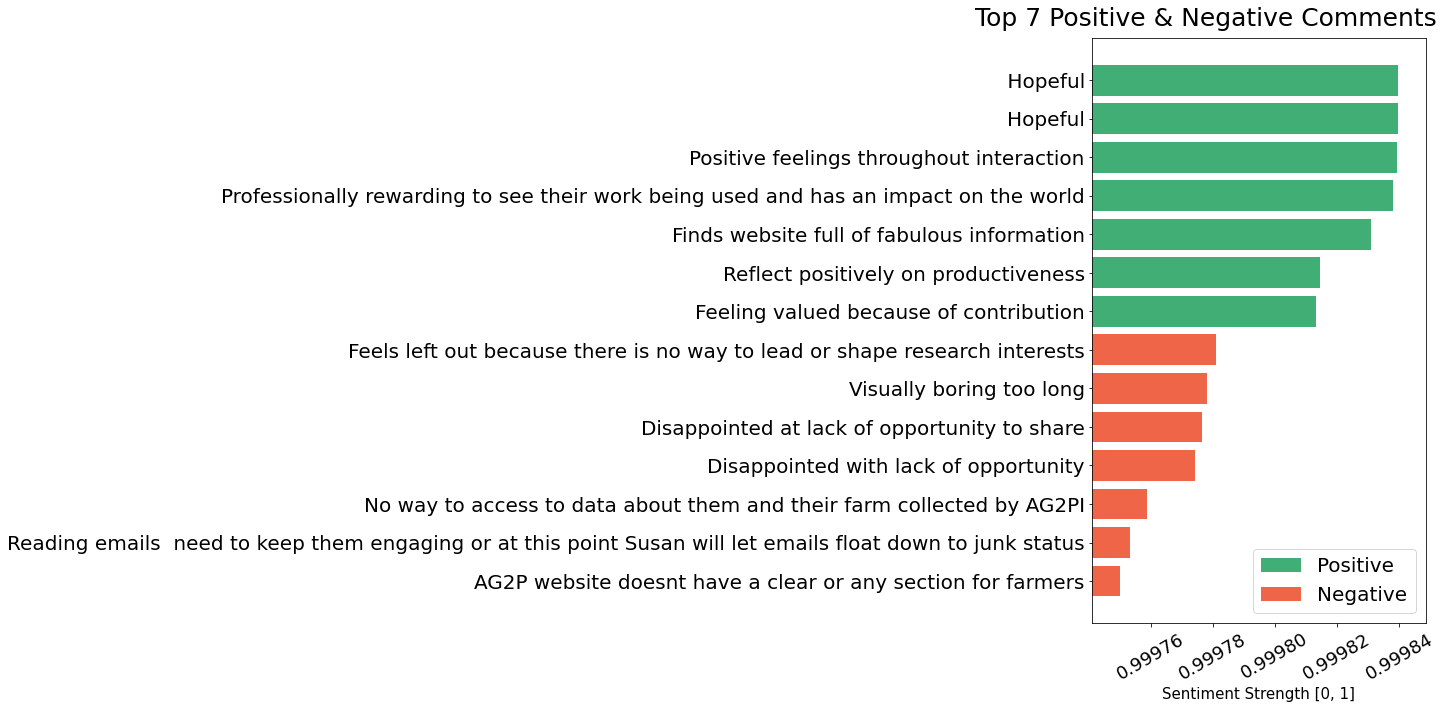

In [90]:
#NOTE: ask about adding sentiments to bars, seems like since we would need so many decimal places
#it could make the graphs look too busy 

#OK now group by persona or any other variable 
allSpans = doc.getSpans(doc.workingDoc)
extremeSent = doc.getExtremes(allSpans, 7)

#version of sentiment figure but built into the document object 
#NOTE: figSize argument (width, height) has default value but we can override with figsize=(width, height)
#by passing that to the method below 
fig = doc.plotExtremes(extremeSent)
ax = fig.axes[0]

#START OF USER STYLING
#x = 1, means place super title 100% to the right of the figure
#ha (horizontal alignment), means place our super title to the right of the point x=1
fig.suptitle("Top 7 Positive & Negative Comments", size=25, x=1, ha="right")
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=18, rotation=30)
ax.set_xlabel("Sentiment Strength [0, 1]", size=15)

plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/extremePosNegClean.jpg", bbox_inches="tight")


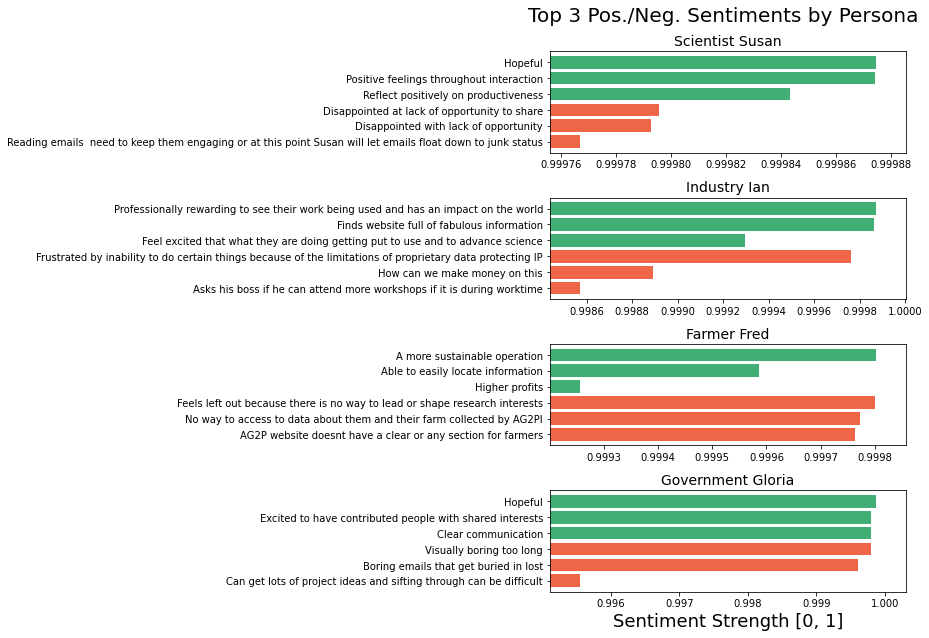

In [95]:
workingDocs = doc.getColSubAttributeDict("Persona", "workingDoc")

#now get spans from working documents dictionary
spanDict = doc.getSpans(workingDocs)

#a dictionary with keys as different personas, vals as tuples of dataframes 
#containing top # of pos, neg sentiments
extremesDict = doc.getExtremes(spanDict, 3)

fig = doc.plotExtremes(extremesDict)

#BEGINNING OF USER STYLING
axs = fig.axes
axs[len(axs)-1].set_xlabel("Sentiment Strength [0, 1]", size=18)
fig.suptitle("Top 3 Pos./Neg. Sentiments by Persona", size = 20, x=.985, ha="right")
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/PersonaExtremePosNeg.jpg", bbox_inches="tight", dpi=1000)


In [117]:
#use this whenever we need to reload the Document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

#if we want to do sentiment analysis, set "sentAnalysis = True" when creating subsetDoc object 
doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp, subsetColumns=["Persona", "Engagement", "Touchpoint"], sentAnalysis=True)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


KeyboardInterrupt: 

In [ ]:
workingDocs = doc.getColSubAttributeDict("Touchpoint", "workingDoc")

#now get spans from working documents dictionary
spanDict = doc.getSpans(workingDocs)

#a dictionary with keys as different personas, vals as tuples of dataframes 
#containing top # of pos, neg sentiments
extremesDict = doc.getExtremes(spanDict, 3)

fig = doc.plotExtremes(extremesDict, figsize=(15, 15))

#BEGINNING OF USER STYLING
axs = fig.axes
axs[len(axs)-1].set_xlabel("Sentiment Strength [0, 1]", size=18)
fig.suptitle("Top 3 Pos./Neg. Sentiments by Touchpoint", size = 20, x=.985, ha="right")
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/PersonaExtremePosNeg.jpg", bbox_inches="tight", dpi=1000)


In [108]:
print(extremesDict)

{'How do they first discover the existence of AG2PI & what are they looking for?': (                                                spans    scores  groundTruth
0               Boring emails that get buried in lost -0.999605            0
3   Time conflict no easily accessible link to mor... -0.999748            0
16                           Visually boring too long -0.999798            0,                                                 spans    scores  groundTruth
14                       A more sustainable operation  0.999802            1
2   Happy to discover that there is a group focusi...  0.999806            1
8          Finds website full of fabulous information  0.999864            1), 'How do they stay in contact with AG2PI ': (                                                spans    scores  groundTruth
42  Afraid that she might have to share IP and cre... -0.999727            0
31  Frustrated by inability to do certain things b... -0.999762            0
5   Reading emails  ne